In [1]:
from dataset_utils import mnist, svhn

import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
def get_tf_dataset(path_to_tfrecords, parsing_fn, shuffle_buffer=1, batch_size=8):
    """Create a basic tensorflow Dataset object from a TFRecords.
    
    Args:
        path_to_tfrecords: Path to the TFrecords
        parsing_fn: parsing function to apply to every element (load Examples)
        shuffle_buffer: Shuffle buffer size to randomize the dataset
        batch_size: Batch size
    """
    print('Creating dataset with batch_size %d and shuffle buffer %d' % (
            batch_size, shuffle_buffer))
    data = tf.data.TFRecordDataset(path_to_tfrecords)
    data = data.shuffle(shuffle_buffer)
    data = data.map(parsing_fn)
    data = data.repeat()
    data = data.batch(batch_size)
    iterator = data.make_one_shot_iterator()
    in_ = iterator.get_next()
    return in_

In [3]:
if not os.path.exists('TFRecords'):
    os.mkdir('TFRecords')

# Table of Contents 

---

In alphabetical order,

  * [MNIST dataset](#mnist)
  * [SVHN dataset](#svhn)

### MNIST
---
<a id='mnist'></a>

Original Download [[link]](http://yann.lecun.com/exdb/mnist/)

Dataset will contain:

  * `image`: (28, 28, 1) float array in [0, 1]
  * `class`: scalar in 0-9

In [4]:
source_path = os.path.expanduser('~/Data/MNIST/')
target_path = 'TFRecords/tf_mnist'

In [14]:
%%time
# convert MNIST dataset to TFRecords
converter = mnist.MNISTConverter(source_path)
converter.convert(target_path)

Loading original MNIST data from /home/aroyer/Data/MNIST/
Load train: 60000 / 60000
Wrote train in file TFRecords/tf_mnist_train

Load test: 10000 / 10000
Wrote test in file TFRecords/tf_mnist_test

CPU times: user 9.25 s, sys: 617 ms, total: 9.87 s
Wall time: 9.89 s


Creating dataset with batch_size 8 and shuffle buffer 1


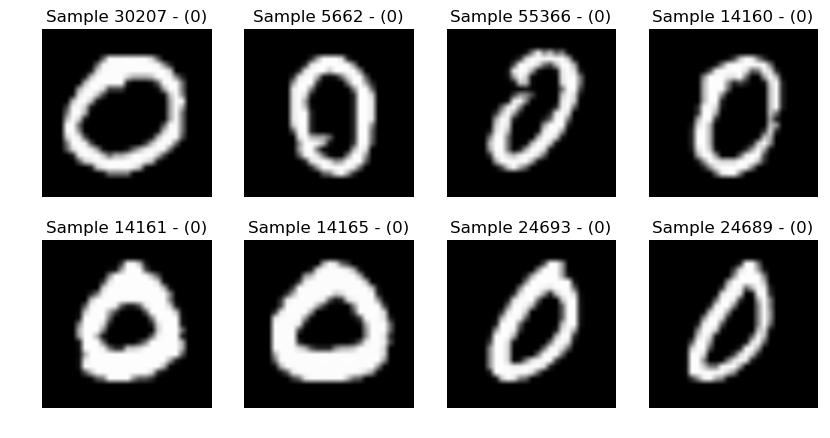

In [17]:
# load training dataset and resize image to 128
loader = mnist.MNISTLoader(resize=128)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(np.tile(data_['image'][i], (1, 1, 3)))
    ax.set_axis_off()
plt.show()

### SVHN
---
<a id='svhn'></a>

Original Download [[link]](http://ufldl.stanford.edu/housenumbers/)

**Format 2** (32x32 images saved in a mat file)

Dataset will contain:

  * `image`: (32, 32, 3) float array in [0, 1]
  * `class`: scalar in 0-9

In [18]:
source_path = os.path.expanduser('~/Data/SVHN/')
target_path = 'tf_svhn'

In [25]:
reload(svhn)

<module 'dataset_utils.svhn' from '/home/aroyer/Projets/TFDatasets/dataset_utils/svhn.py'>

In [26]:
%%time
# convert SVHN dataset to TFRecords
converter = svhn.SVHNConverter(source_path)
converter.convert(target_path)

Loading original SVHN data from /home/aroyer/Data/SVHN/
Load train: 73257 / 73257
Wrote train in file tf_svhn_train

Load test: 26032 / 26032
Wrote test in file tf_svhn_test

CPU times: user 13.1 s, sys: 861 ms, total: 14 s
Wall time: 14.5 s


Creating dataset with batch_size 8 and shuffle buffer 1


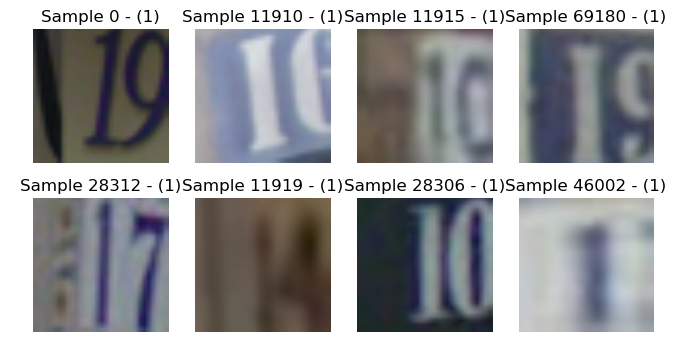

In [27]:
# load training dataset
loader = svhn.SVHNLoader(resize=64)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(8, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()